# Market_Segmentation_using_K-Means_Clustering

## Importing The Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as mpl

## Importing The Dataset

In [2]:
creditcard_df = pd.read_csv('Marketing_data.csv')
creditcard_df

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

## Description about all Columns/Features

==> CUSTID: Identification of Credit Card holder

==> BALANCE: Balance amount left in customer's account to make purchases

==> BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

==> PURCHASES: Amount of purchases made from account

==> ONEOFFPURCHASES: Maximum purchase amount done in one-go

==> INSTALLMENTS_PURCHASES: Amount of purchase done in installment

==> CASH_ADVANCE: Cash in advance given by the user

==> PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

==> ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

==> PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

==> CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid

==> CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"

==> PURCHASES_TRX: Number of purchase transactions made

==> CREDIT_LIMIT: Limit of Credit Card for user

==> PAYMENTS: Amount of Payment done by user

==> MINIMUM_PAYMENTS: Minimum amount of payments made by user

==> PRC_FULL_PAYMENT: Percent of full payment paid by user

==> TENURE: Tenure of credit card service for user

In [3]:
creditcard_df.shape

(8950, 18)

In [4]:
creditcard_df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [5]:
creditcard_df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

## Finding Unique Values

## value_counts()

In [6]:
for col in list(creditcard_df):
    print(col)
    print(creditcard_df[col].unique())

CUST_ID
['C10001' 'C10002' 'C10003' ... 'C19188' 'C19189' 'C19190']
BALANCE
[  40.900749 3202.467416 2495.148862 ...   23.398673   13.457564
  372.708075]
BALANCE_FREQUENCY
[0.818182 0.909091 1.       0.636364 0.545455 0.875    0.454545 0.727273
 0.5      0.888889 0.090909 0.272727 0.363636 0.       0.666667 0.75
 0.857143 0.181818 0.333333 0.6      0.3      0.125    0.9      0.833333
 0.8      0.2      0.777778 0.555556 0.25     0.142857 0.571429 0.4
 0.444444 0.714286 0.222222 0.1      0.625    0.428571 0.111111 0.285714
 0.7      0.375    0.166667]
PURCHASES
[  95.4     0.    773.17 ...  291.12  144.4  1093.25]
ONEOFF_PURCHASES
[   0.    773.17 1499.   ...  734.4  1012.73 1093.25]
INSTALLMENTS_PURCHASES
[  95.4     0.   1333.28 ...  113.28  291.12  144.4 ]
CASH_ADVANCE
[   0.       6442.945483  205.788017 ... 8555.409326   36.558778
  127.040008]
PURCHASES_FREQUENCY
[0.166667 0.       1.       0.083333 0.666667 0.333333 0.25     0.75
 0.5      0.416667 0.916667 0.583333 0.375    0.6

In [7]:
for col in list(creditcard_df):
    print(col, creditcard_df[col].nunique())

CUST_ID 8950
BALANCE 8871
BALANCE_FREQUENCY 43
PURCHASES 6203
ONEOFF_PURCHASES 4014
INSTALLMENTS_PURCHASES 4452
CASH_ADVANCE 4323
PURCHASES_FREQUENCY 47
ONEOFF_PURCHASES_FREQUENCY 47
PURCHASES_INSTALLMENTS_FREQUENCY 47
CASH_ADVANCE_FREQUENCY 54
CASH_ADVANCE_TRX 65
PURCHASES_TRX 173
CREDIT_LIMIT 205
PAYMENTS 8711
MINIMUM_PAYMENTS 8636
PRC_FULL_PAYMENT 47
TENURE 7


## Describe()

In [8]:
creditcard_df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [9]:
# Let's see who made one off purchase of $40761!
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.25]

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
550  C10574  11547.52001                1.0   49039.57          40761.25   

     INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
550                 8278.32    558.166886                  1.0   

     ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
550                         1.0                          0.916667   

     CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
550                0.083333                 1            101       22500.0   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
550  46930.59824       2974.069421              0.25      12

In [10]:
creditcard_df['CASH_ADVANCE'].max()

47137.211760000006

In [11]:
# Let's see who made cash advance of $47137!
# This customer made 123 cash advance transactions!!
# Never paid credit card in full

creditcard_df[creditcard_df['CASH_ADVANCE'] == 47137.211760000006]

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
2159  C12226  10905.05381                1.0     431.93             133.5   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
2159                  298.43   47137.21176             0.583333   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
2159                        0.25                               0.5   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
2159                     1.0               123             21       19600.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
2159  39048.59762       5394.173671               0.0      12

## Missing_Values()

In [12]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

<AxesSubplot:>

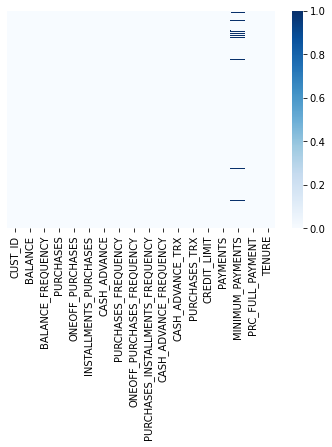

In [13]:
sb.heatmap(creditcard_df.isnull(),cmap = 'Blues',yticklabels = False)

In [14]:
mean_value = creditcard_df[['MINIMUM_PAYMENTS','CREDIT_LIMIT']].mean()
mean_value

MINIMUM_PAYMENTS     864.206542
CREDIT_LIMIT        4494.449450
dtype: float64

In [15]:
mean_value = creditcard_df['CREDIT_LIMIT'].mean()
creditcard_df['CREDIT_LIMIT'].fillna(value=mean_value, inplace=True)

mean_value = creditcard_df['MINIMUM_PAYMENTS'].mean()
creditcard_df['MINIMUM_PAYMENTS'].fillna(value=mean_value, inplace=True)

In [16]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

<AxesSubplot:>

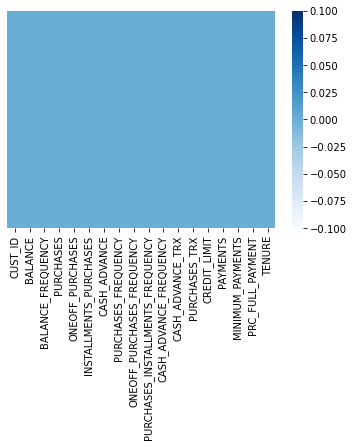

In [17]:
sb.heatmap(creditcard_df.isnull(),cmap = 'Blues',yticklabels = False)

## Checking Duplicated Values

In [18]:
# Let's see if we have duplicated entries in the data
creditcard_df.duplicated().sum()

0

In [19]:
# Let's drop Customer ID 
creditcard_df.drop("CUST_ID", axis = 1, inplace= True)

## Exploratory Data Analysis

## Dist Plots

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

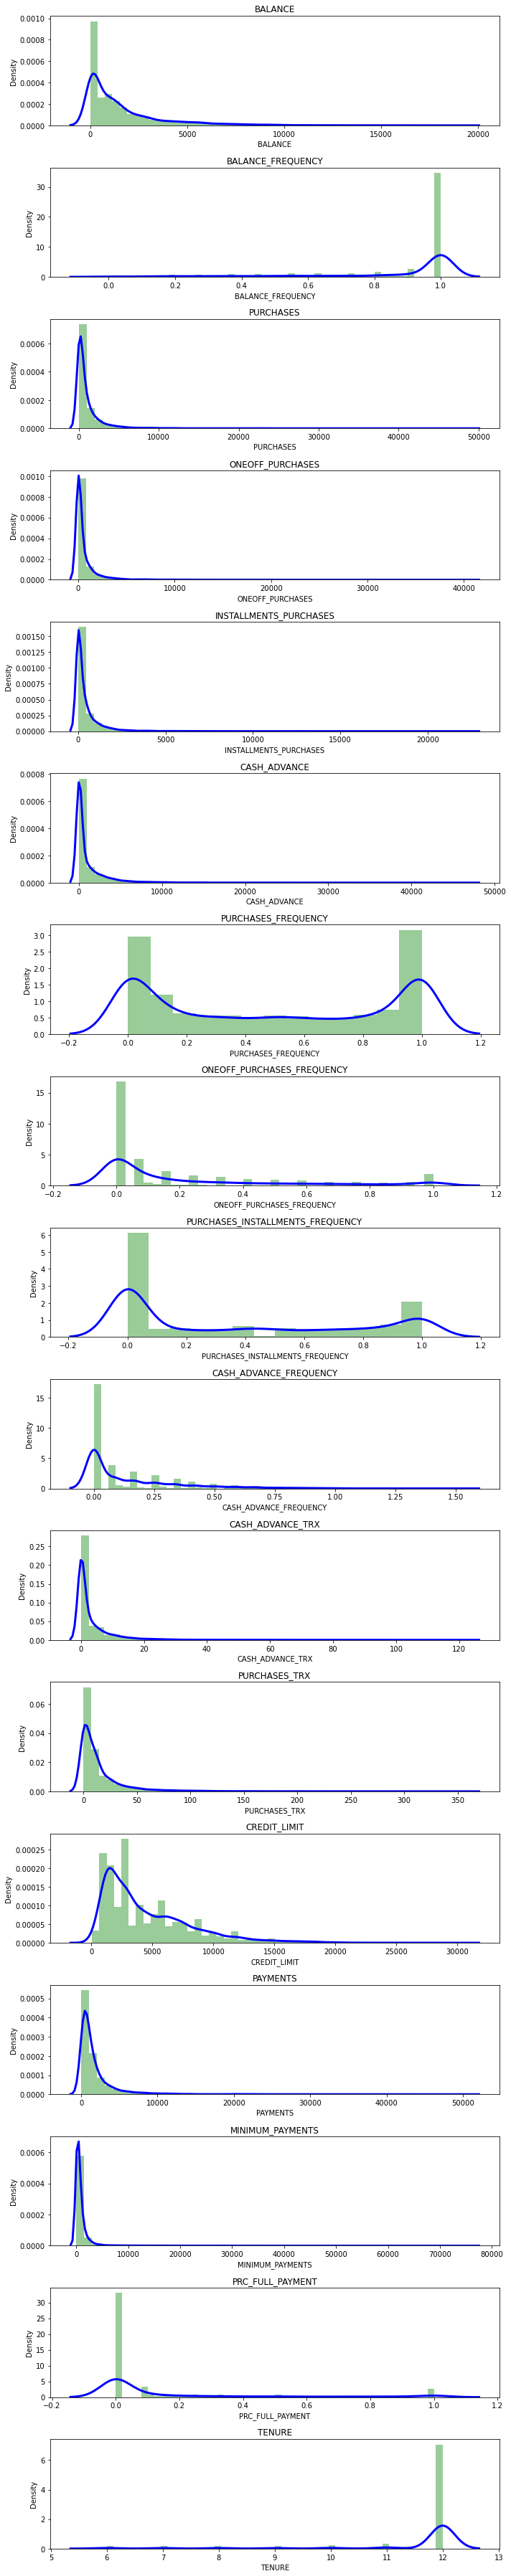

In [20]:
mpl.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
    mpl.subplot(17, 1, i+1)
    sb.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
    mpl.title(creditcard_df.columns[i])

mpl.tight_layout()
mpl.show()

## Pairplot

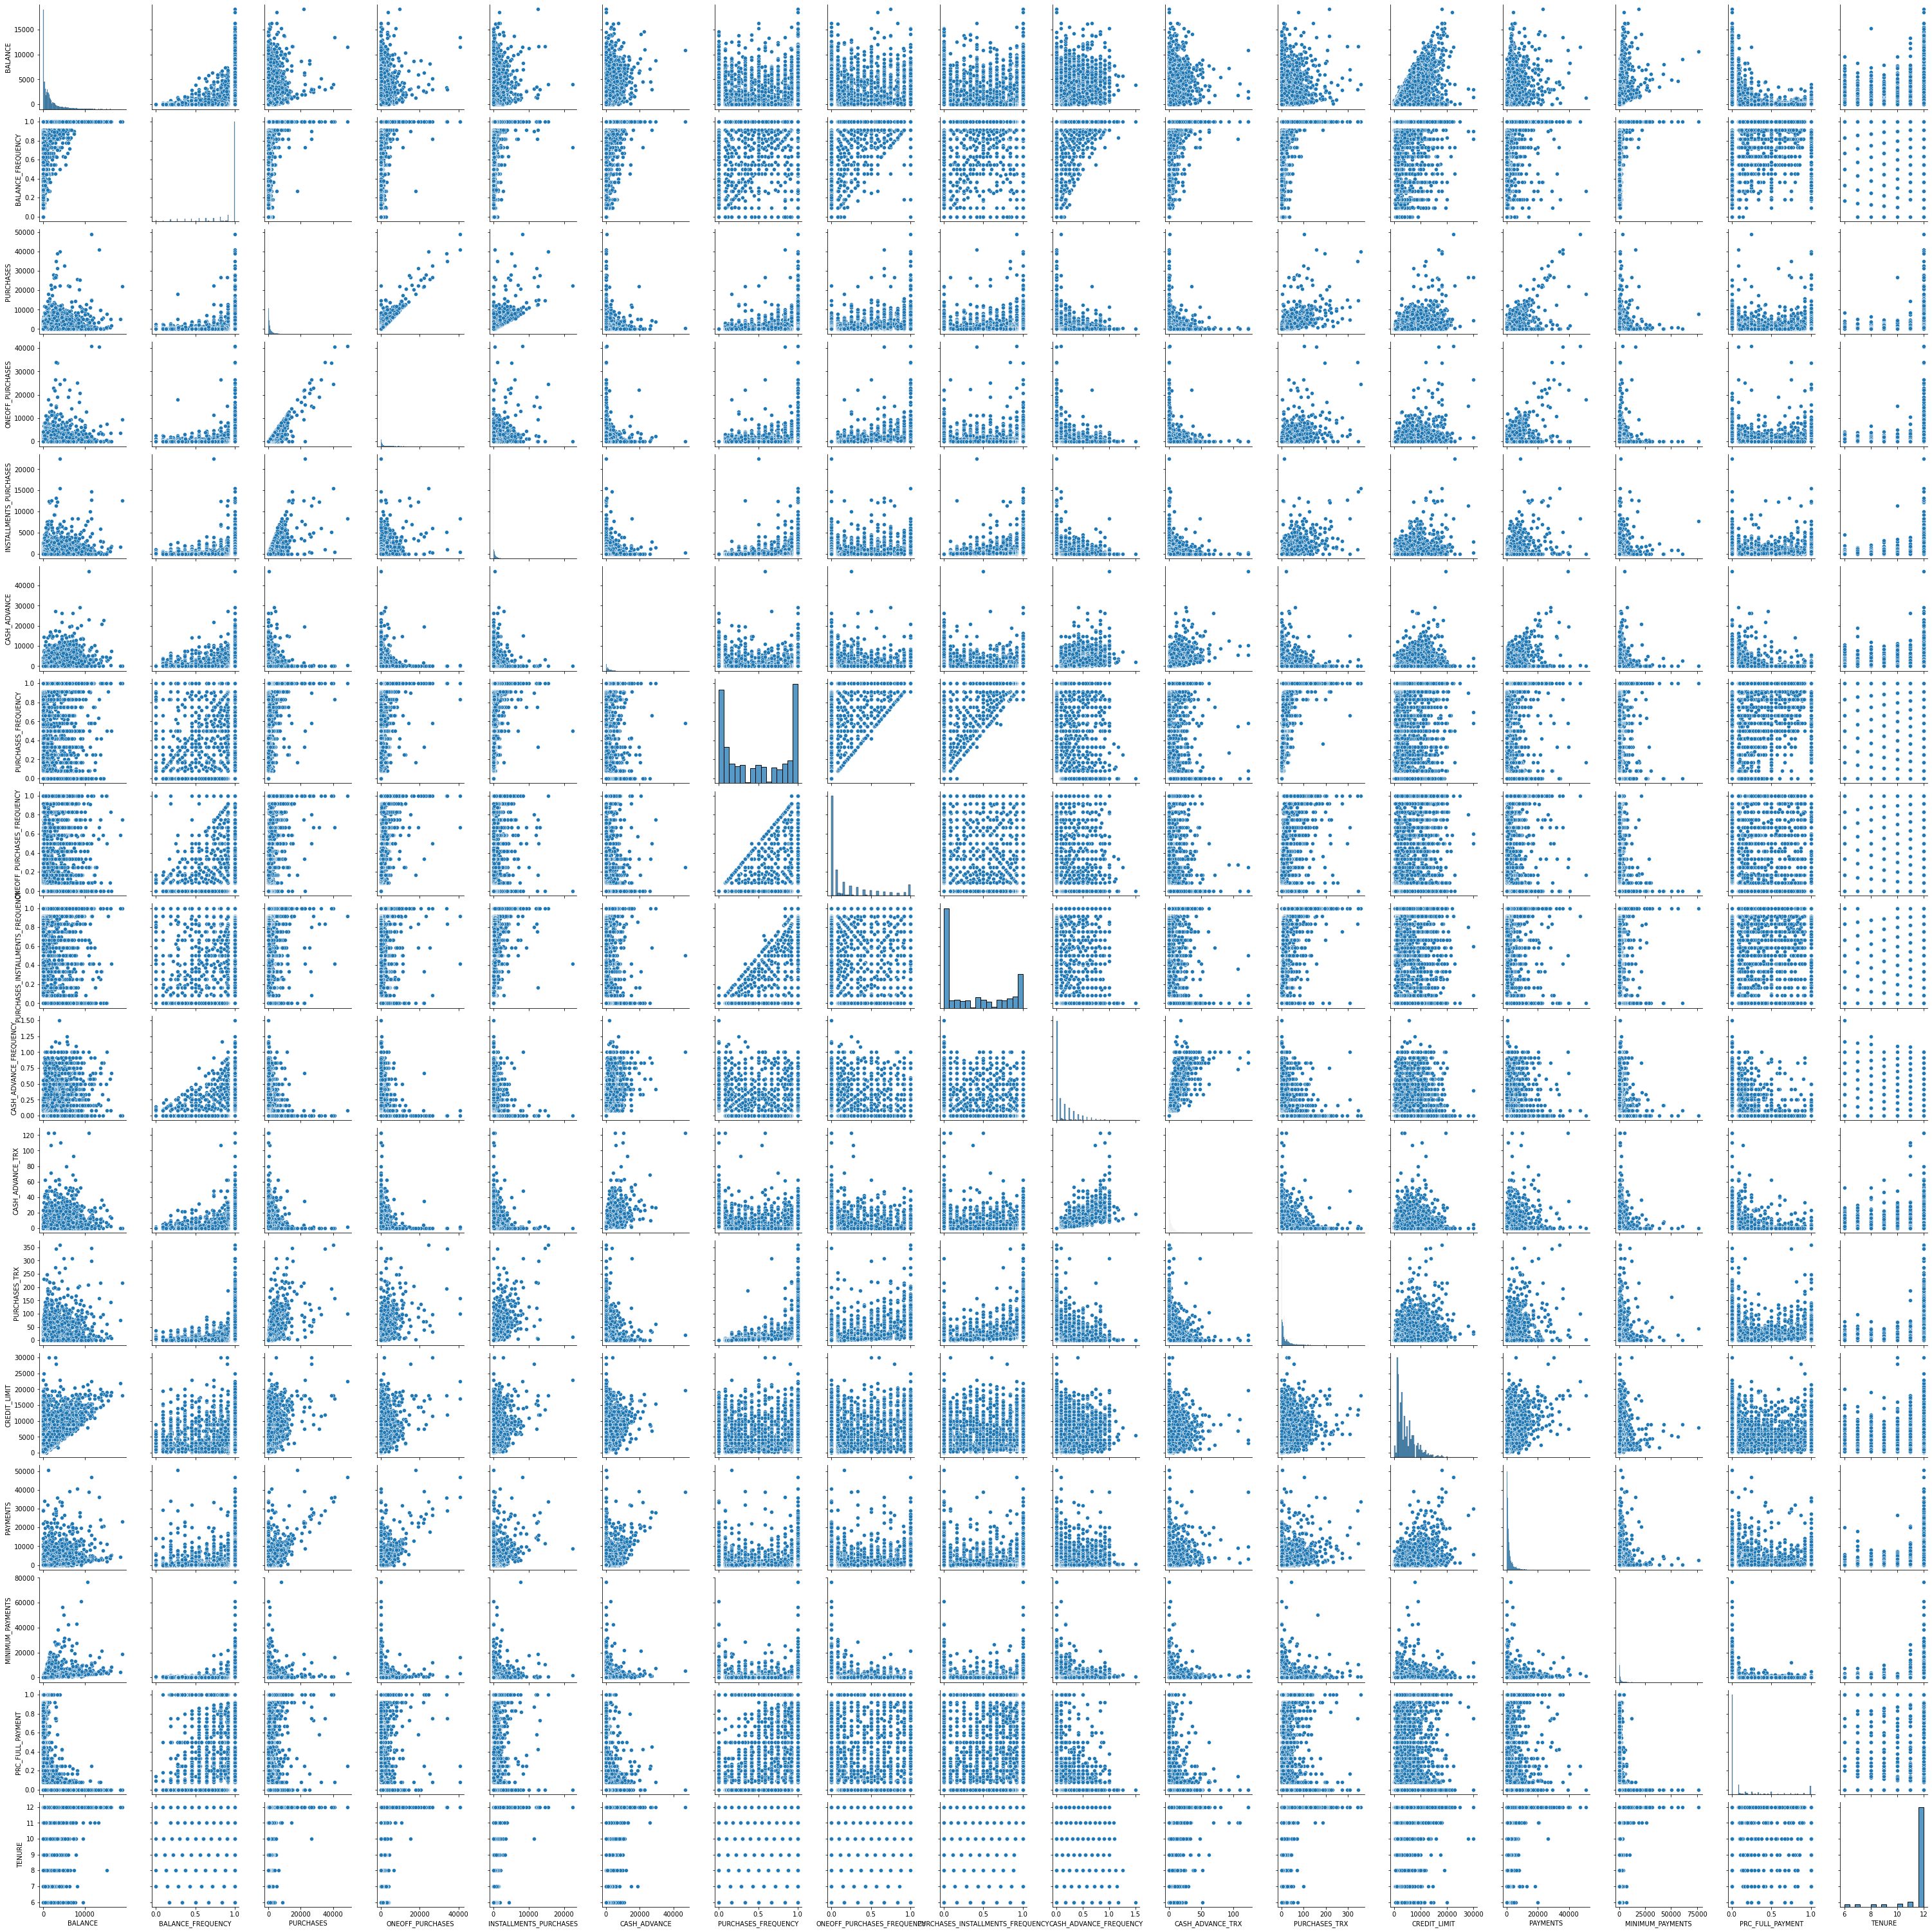

In [21]:
sb.pairplot(creditcard_df)
# Correlation between 'PURCHASES' and ONEOFF_PURCHASES & INSTALMENT_PURCHASES 
# Trend between 'PURCHASES' and 'CREDIT_LIMIT' & 'PAYMENTS'

## Correlation

In [22]:
corr = creditcard_df.corr()
corr

BALANCE  BALANCE_FREQUENCY  PURCHASES  \
BALANCE                           1.000000           0.322412   0.181261   
BALANCE_FREQUENCY                 0.322412           1.000000   0.133674   
PURCHASES                         0.181261           0.133674   1.000000   
ONEOFF_PURCHASES                  0.164350           0.104323   0.916845   
INSTALLMENTS_PURCHASES            0.126469           0.124292   0.679896   
CASH_ADVANCE                      0.496692           0.099388  -0.051474   
PURCHASES_FREQUENCY              -0.077944           0.229715   0.393017   
ONEOFF_PURCHASES_FREQUENCY        0.073166           0.202415   0.498430   
PURCHASES_INSTALLMENTS_FREQUENCY -0.063186           0.176079   0.315567   
CASH_ADVANCE_FREQUENCY            0.449218           0.191873  -0.120143   
CASH_ADVANCE_TRX                  0.385152           0.141555  -0.067175   
PURCHASES_TRX                     0.154338           0.189626   0.689561   
CREDIT_LIMIT                      0.531267           0.095795   0.356959   
PAYMENTS                          0.322802           0.065008   0.603264   
MINIMUM_PAYMENTS                  0.394282           0.114249   0.093515   
PRC_FULL_PAYMENT                 -0.318959          -0.095082   0.180379   
TENURE                            0.072692           0.119776   0.086288   

                                  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
BALANCE                                   0.164350                0.126469   
BALANCE_FREQUENCY                         0.104323                0.124292   
PURCHASES                                 0.916845                0.679896   
ONEOFF_PURCHASES                          1.000000                0.330622   
INSTALLMENTS_PURCHASES                    0.330622                1.000000   
CASH_ADVANCE                             -0.031326               -0.064244   
PURCHASES_FREQUENCY                       0.264937                0.442418   
ONEOFF_PURCHASES_FREQUENCY                0.524891                0.214042   
PURCHASES_INSTALLMENTS_FREQUENCY          0.127729                0.511351   
CASH_ADVANCE_FREQUENCY                   -0.082628               -0.132318   
CASH_ADVANCE_TRX                         -0.046212               -0.073999   
PURCHASES_TRX                             0.545523                0.628108   
CREDIT_LIMIT                              0.319721                0.256496   
PAYMENTS                                  0.567292                0.384084   
MINIMUM_PAYMENTS                          0.048597                0.131687   
PRC_FULL_PAYMENT                          0.132763                0.182569   
TENURE                                    0.064150                0.086143   

                                  CASH_ADVANCE  PURCHASES_FREQUENCY  \
BALANCE                               0.496692            -0.077944   
BALANCE_FREQUENCY                     0.099388             0.229715   
PURCHASES                            -0.051474             0.393017   
ONEOFF_PURCHASES                     -0.031326             0.264937   
INSTALLMENTS_PURCHASES               -0.064244             0.442418   
CASH_ADVANCE                          1.000000            -0.215507   
PURCHASES_FREQUENCY                  -0.215507             1.000000   
ONEOFF_PURCHASES_FREQUENCY           -0.086754             0.501343   
PURCHASES_INSTALLMENTS_FREQUENCY     -0.177070             0.862934   
CASH_ADVANCE_FREQUENCY                0.628522            -0.308478   
CASH_ADVANCE_TRX                      0.656498            -0.203478   
PURCHASES_TRX                        -0.075850             0.568430   
CREDIT_LIMIT                          0.303983             0.119778   
PAYMENTS                              0.453238             0.103464   
MINIMUM_PAYMENTS                      0.139223             0.002976   
PRC_FULL_PAYMENT                     -0.152935             0.305802   
TENURE                               -0.068312        

## Haeat Map

<AxesSubplot:>

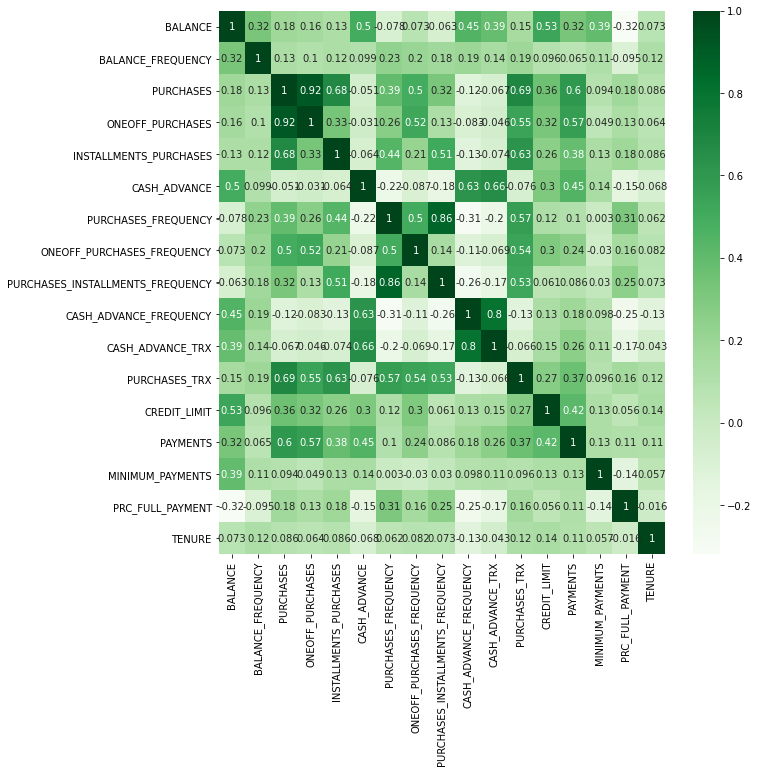

In [23]:
mpl.figure(figsize = (10, 10))
sb.heatmap(corr, annot = True, cmap='Greens')

## Feature Scailing

In [24]:
# Let's scale the data first

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [25]:
creditcard_df_scaled.shape

(8950, 17)

In [26]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

## Finding Optimal Number of Clusters

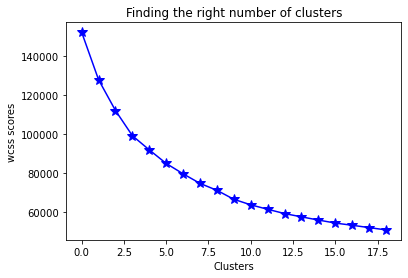

In [45]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 20):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(creditcard_df_scaled)
    wcss.append(kmeans.inertia_) 

mpl.plot(wcss, 'b*-', markersize=10)
mpl.title('Finding the right number of clusters')
mpl.xlabel('Clusters')
mpl.ylabel('wcss scores') 
mpl.show()

# From this we can observe that, 4th cluster seems to be forming the elbow of the curve. 
# However, the values does not reduce linearly until 8th cluster. 
# Let's choose the number of clusters to be 7.

## Applying kmeans clustering on the scaled data with 8 clusters

In [28]:
kmeans = KMeans(8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [29]:
kmeans.labels_

array([1, 3, 4, ..., 0, 0, 0])

In [30]:
# To display the centroids
kmeans.cluster_centers_.shape

(8, 17)

In [31]:
# centroids represented in the dataframe
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers  

BALANCE BALANCE_FREQUENCY  PURCHASES ONEOFF_PURCHASES  \
0 -0.334901         -0.349885  -0.287298        -0.212974   
1  0.007994          0.404702  -0.354248        -0.238968   
2 -0.700916         -2.135919  -0.309790        -0.234351   
3  1.672951          0.390531  -0.221331        -0.157770   
4 -0.119467          0.403212   0.565086         0.684872   
5  1.086172          0.472614   2.606207         1.903728   
6 -0.357965          0.332433  -0.029606        -0.240593   
7  1.865907          0.332878  12.596844        13.111182   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0              -0.287679     0.068020           -0.203948   
1              -0.398478    -0.099332           -0.841287   
2              -0.301835    -0.322887           -0.552623   
3              -0.233551     1.999737           -0.481568   
4               0.077706    -0.332015            0.998929   
5               2.664995    -0.126617            1.163761   
6               0.371813    -0.362520            0.997057   
7               5.696389    -0.004178            1.033322   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                  -0.284236                        -0.227466   
1                  -0.383434                        -0.750861   
2                  -0.440210                        -0.438526   
3                  -0.213481                        -0.421808   
4                   1.914414                         0.215562   
5                   1.584646                         1.260021   
6                  -0.380677                         1.208315   
7                   2.170634                         0.866221   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0               0.307808        -0.000179     -0.387812    -0.562209   
1               0.094975        -0.034346     -0.477710    -0.306086   
2              -0.522023        -0.376648     -0.418105    -0.175016   
3               1.909869         1.916129     -0.271317     1.015488   
4              -0.416725        -0.332412      0.660188     0.466389   
5              -0.269145        -0.128824      3.218719     1.337649   
6              -0.471903        -0.359553      0.195249    -0.259534   
7              -0.476183        -0.214854      4.566558     3.174197   

   PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT    TENURE  
0 -0.391666        -0.208921         0.012748 -3.197669  
1 -0.251884        -0.013060        -0.454840  0.274356  
2 -0.201945        -0.257046         0.284044  0.201773  
3  0.814604         0.548358        -0.391211  0.071124  
4  0.162974        -0.155294         0.459225  0.274613  
5  1.532138         0.601452         0.259664  0.335772  
6 -0.213084        -0.029779         0.313067  0.255413  
7  8.991136         1.064817         1.236317  0.295702

In [32]:
# In order to understand what these numbers mean, let's perform inverse transformation

cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

BALANCE BALANCE_FREQUENCY     PURCHASES ONEOFF_PURCHASES  \
0   867.405752          0.794386    389.387444       238.943722   
1  1581.114674          0.973141    246.349159       195.798762   
2   105.576699          0.371291    341.333789       203.462143   
3  5046.581251          0.969784    530.327170       330.572295   
4  1315.813676          0.972788   2210.520143      1729.183911   
5  3825.250962          0.989229   6571.407182      3752.236061   
6   819.401487          0.956021    939.952078       193.102063   
7  5448.201718          0.956126  27916.555652     22354.314348   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0             150.922955  1121.512020            0.408496   
1              50.729054   770.566774            0.152702   
2             138.122110   301.761115            0.268556   
3             199.870409  5172.413840            0.297074   
4             481.336232   282.619724            0.891269   
5            2820.989303   713.349682            0.957424   
6             747.293110   218.649226            0.890518   
7            5562.241304   970.110470            0.905072   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   0.117664                         0.274036   
1                   0.088072                         0.066026   
2                   0.071134                         0.190156   
3                   0.138772                         0.196800   
4                   0.773565                         0.450107   
5                   0.675188                         0.865202   
6                   0.088894                         0.844653   
7                   0.850000                         0.708696   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX  CREDIT_LIMIT  \
0               0.196740         3.247604      5.070288   2448.904871   
1               0.154150         3.014440      2.835740   3380.782190   
2               0.030682         0.678481      4.317300   3857.670417   
3               0.517329        16.325000      7.965909   8189.209711   
4               0.051753         0.980357     31.119643   6191.363636   
5               0.081286         2.369697     94.715152   9361.363636   
6               0.040712         0.795139     19.562996   3550.158830   
7               0.039855         1.782609    128.217391  16043.478261   

       PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT     TENURE  
0    599.308188       377.324957         0.157443   7.238019  
1   1003.963052       833.769714         0.020682  11.884477  
2   1148.533664       265.172405         0.236793  11.787342  
3   4091.341643      2142.131757         0.039292  11.612500  
4   2204.938747       502.301443         0.288030  11.884821  
5   6168.534001      2265.864024         0.229662  11.966667  
6   1116.287417       794.807299         0.245281  11.859127  
7  27761.600386      3345.718254         0.515316  11.913043

==> First Customers cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money, Cluster with lowest balance ($104) and cash advance ($303), Percentage of full payment = 23%
    
==> Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance ($5000) and cash advance (~$5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)
    
==> Third customer cluster (VIP/Prime): high credit limit $16K and highest percentage of full payment, target for increase credit limit and increase spending habits
    
==> Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance 

In [33]:
labels.shape          # Labels associated to each data point

(8950,)

In [34]:
labels.max()

7

In [35]:
labels.min()

0

In [36]:
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)
y_kmeans

array([1, 0, 2, ..., 7, 7, 7])

In [37]:
# concatenate the clusters labels to our original dataframe

creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0   201.802084        139.509787          0.000000      12        1  
1  4103.032597       1072.340217          0.222222      12        3  
2   622.066742        627.284787          0.000000      12        4  
3     0.000000        864.206542          0.000000      12        1  
4   678.334763        244.791237          0.000000      12        1

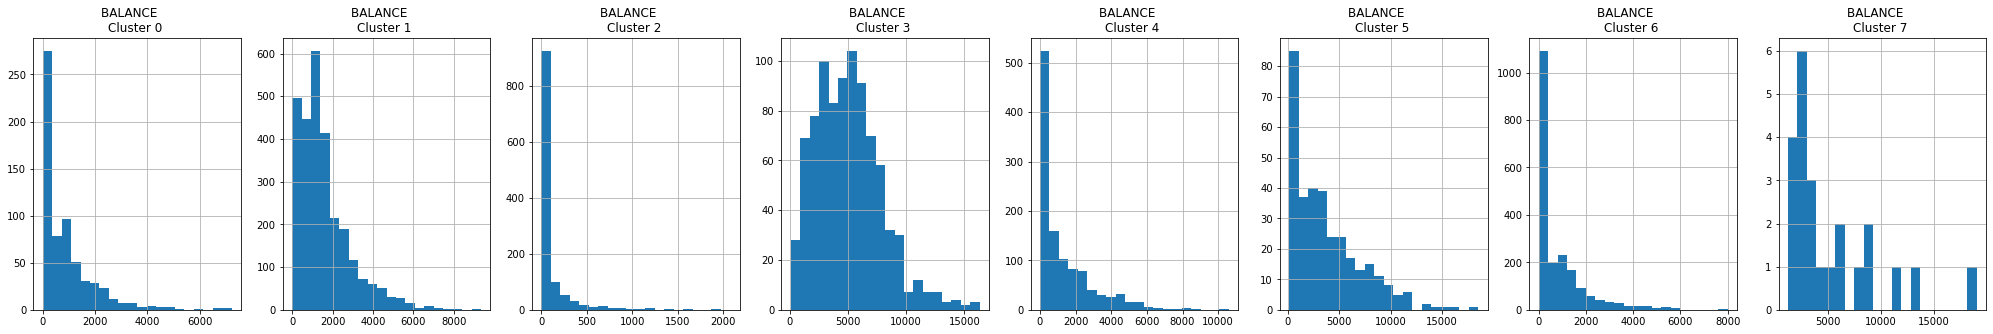

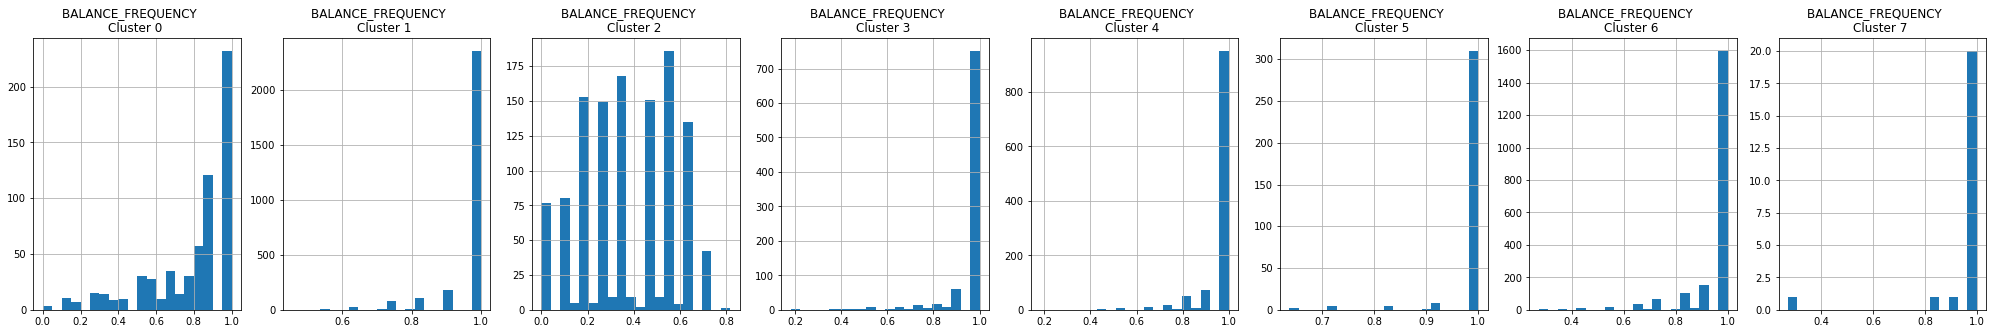

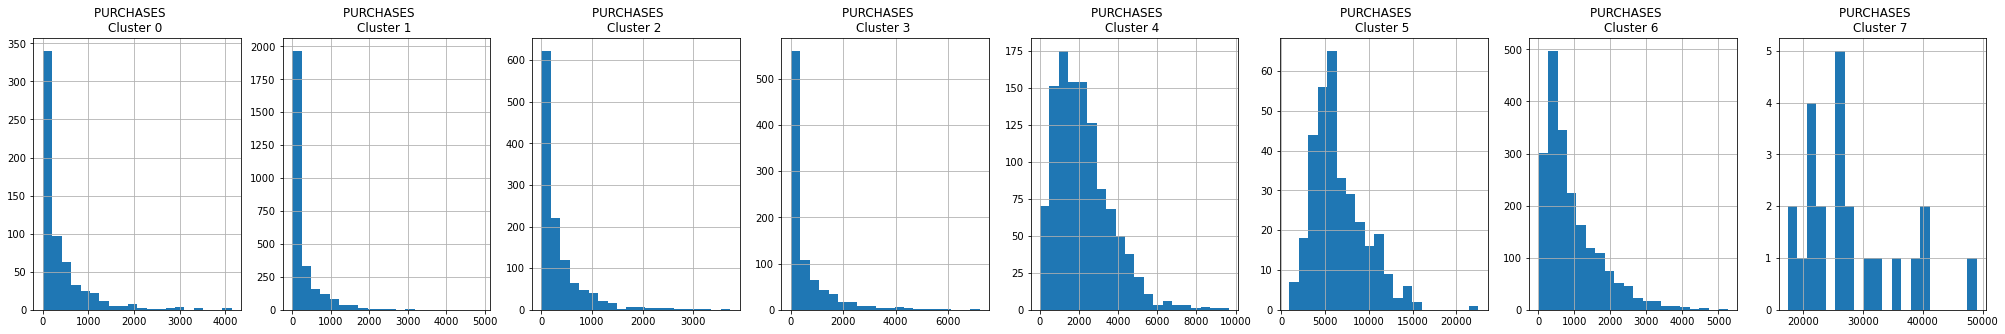

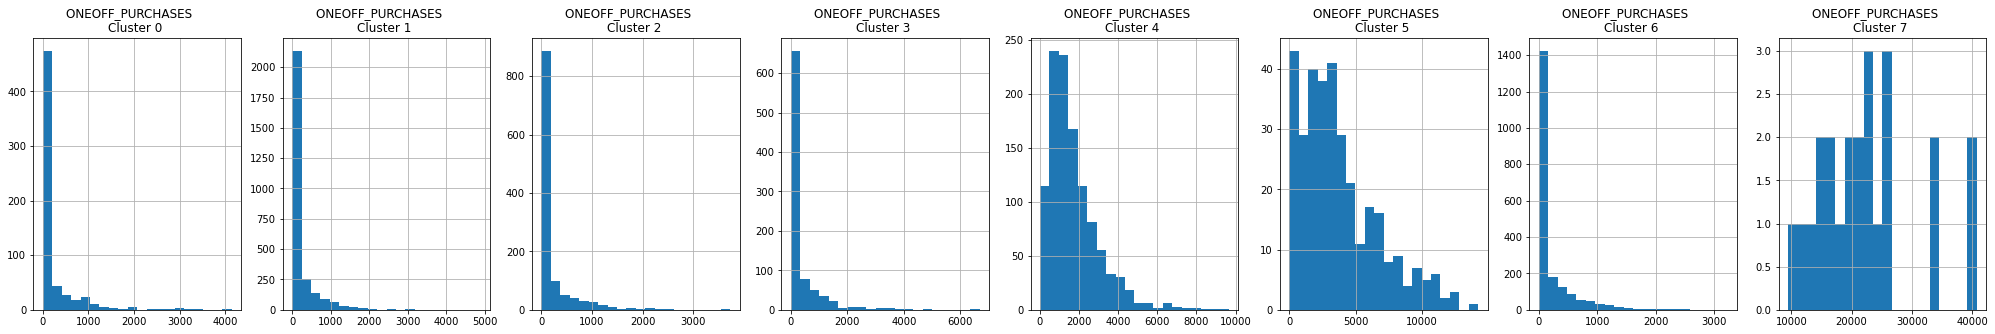

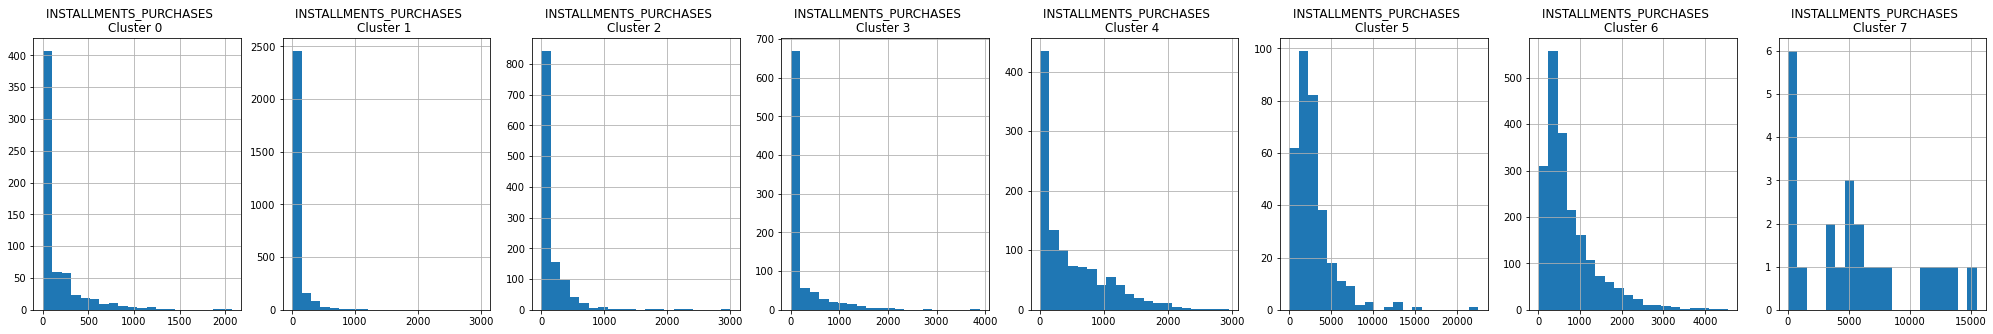

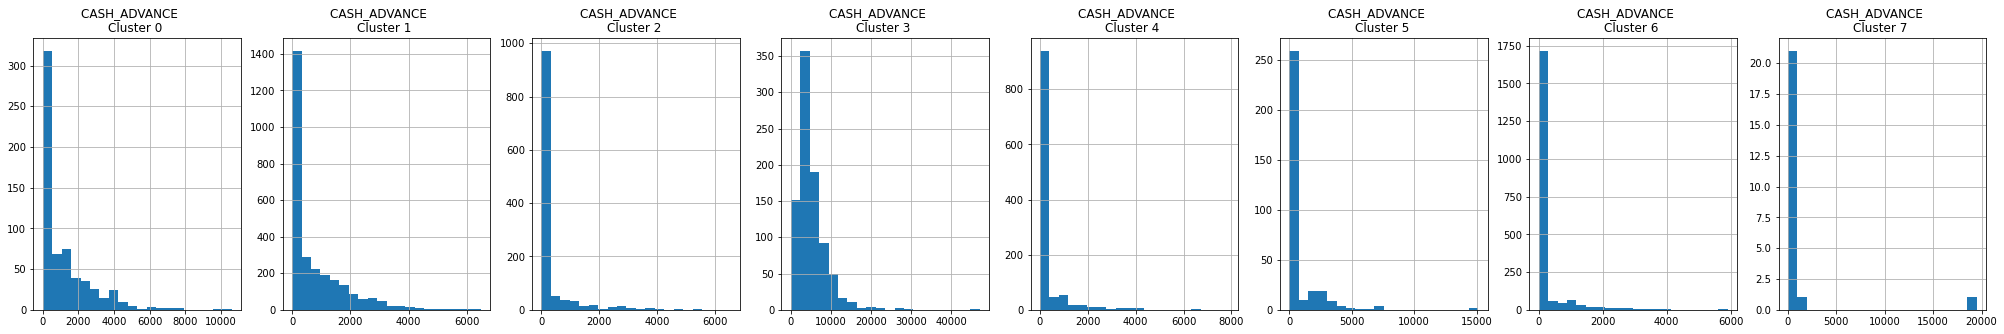

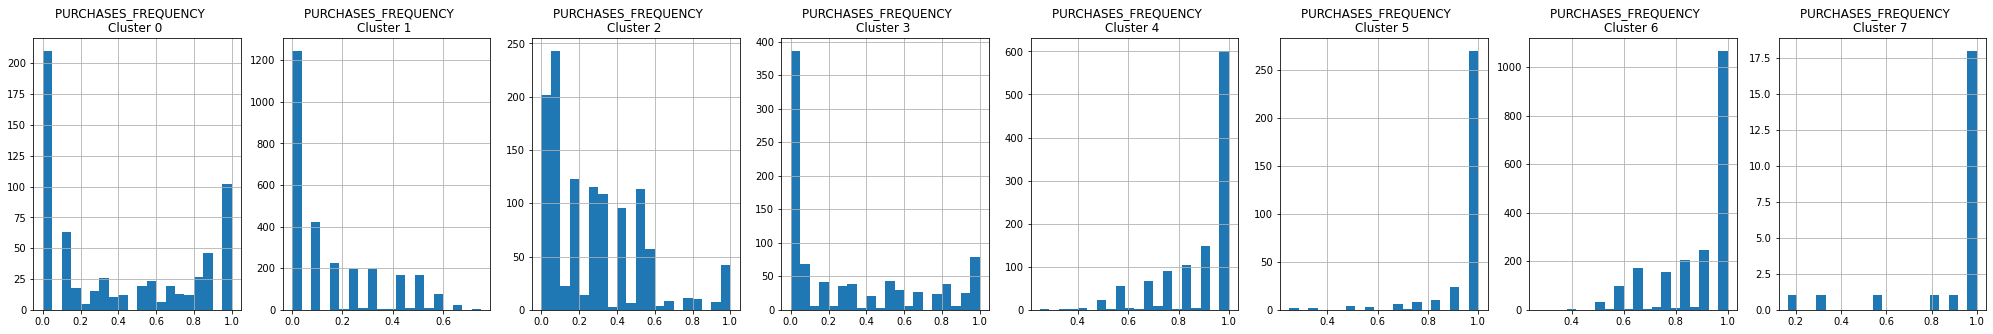

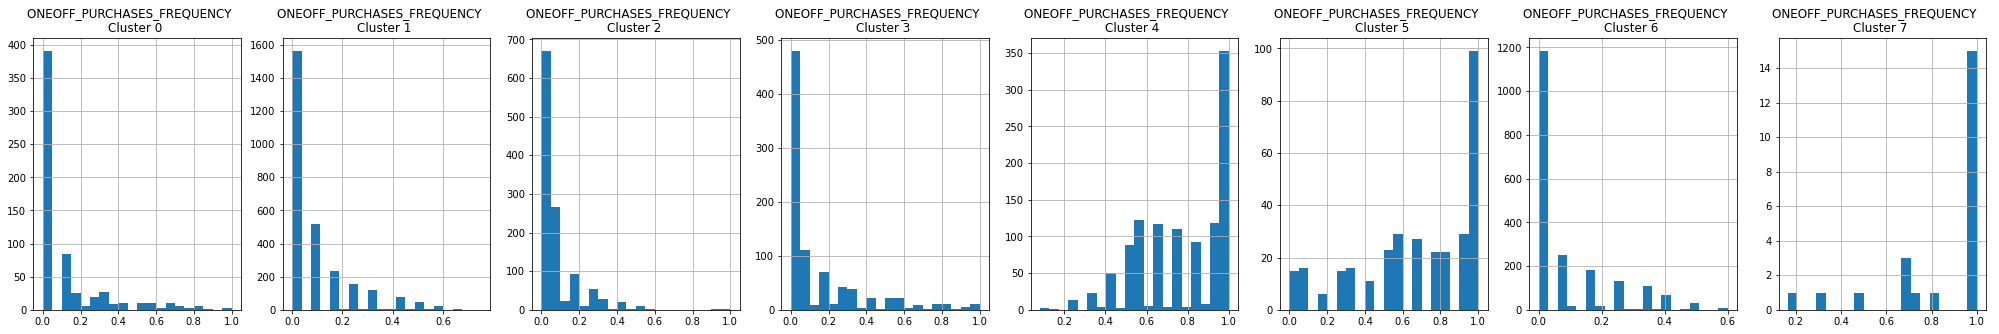

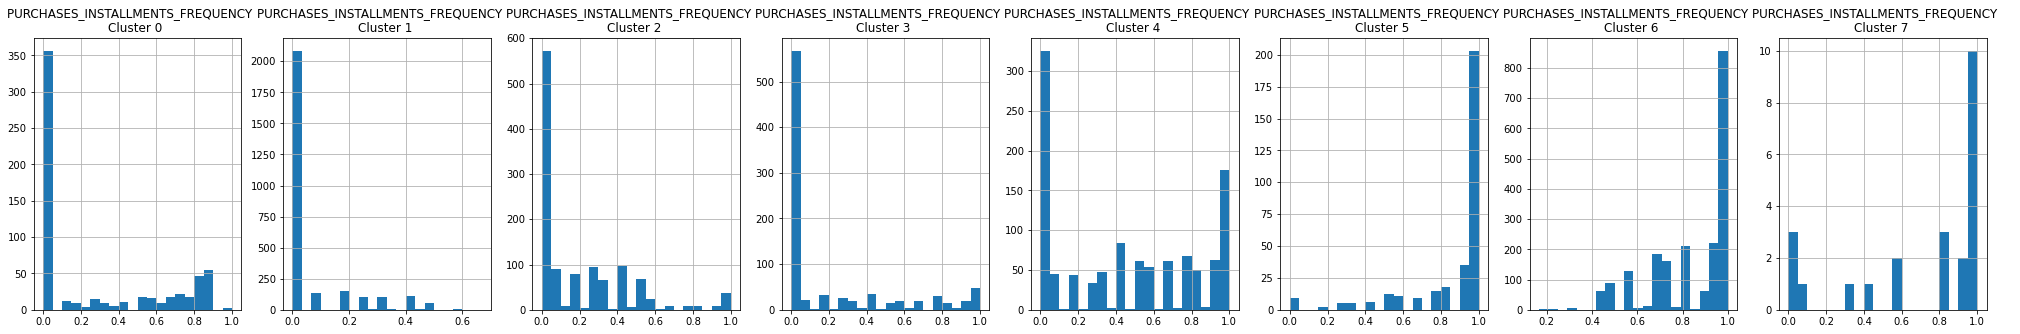

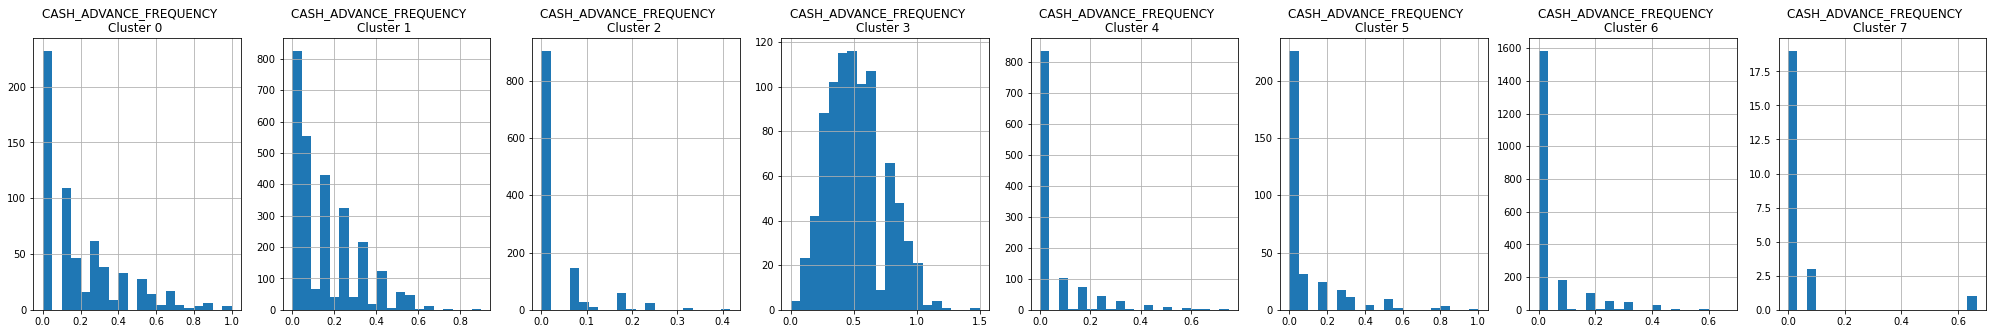

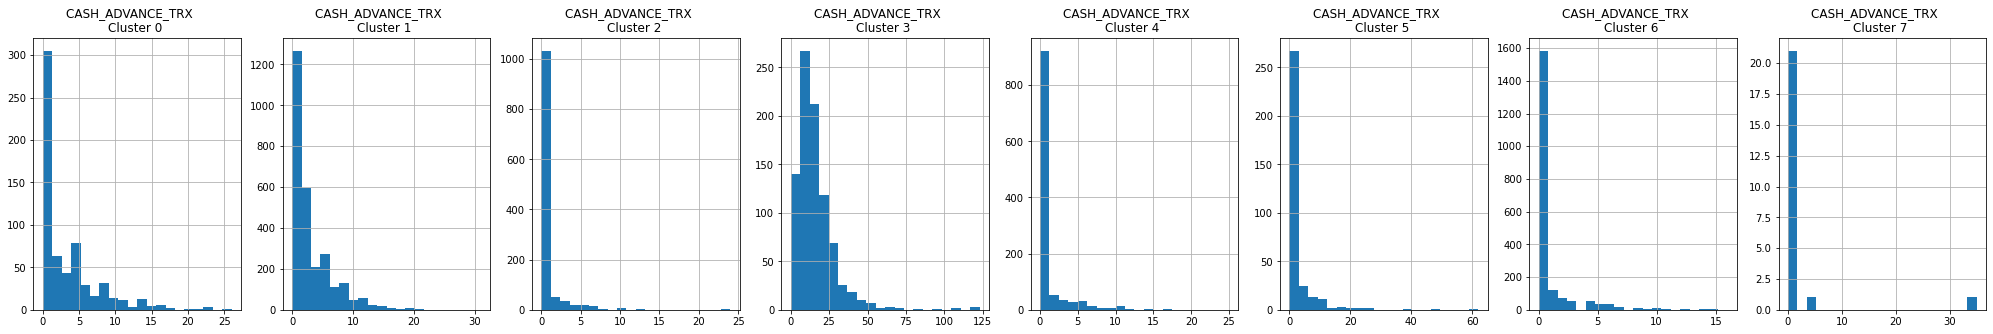

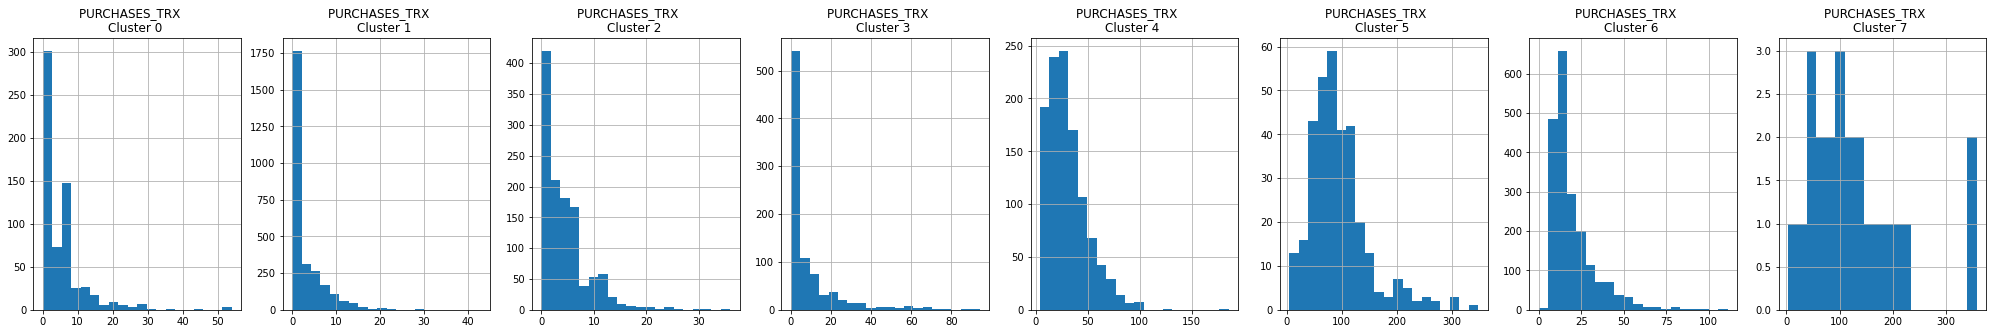

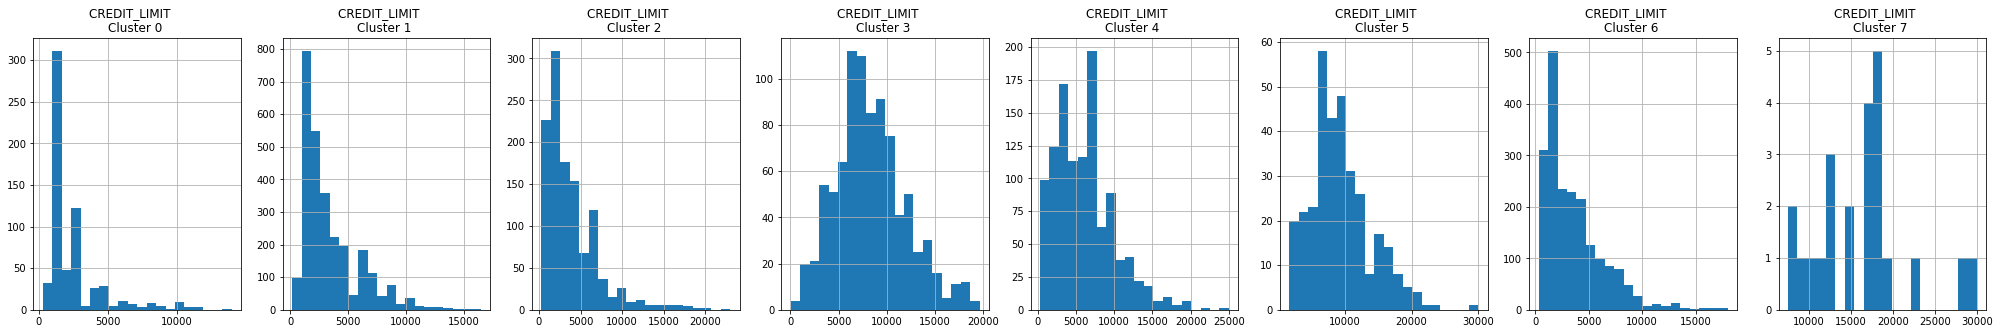

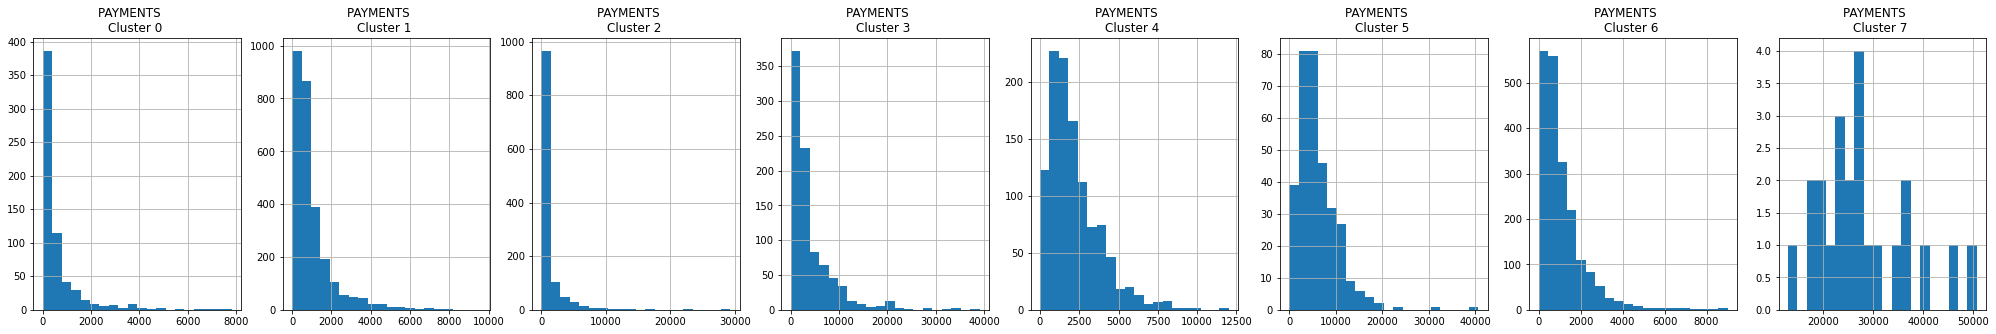

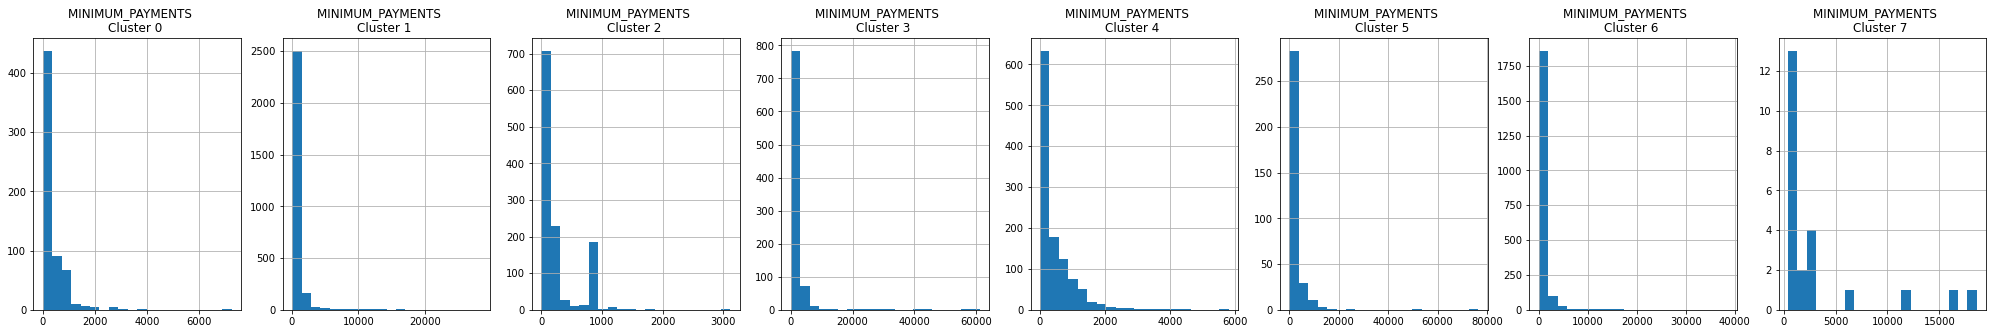

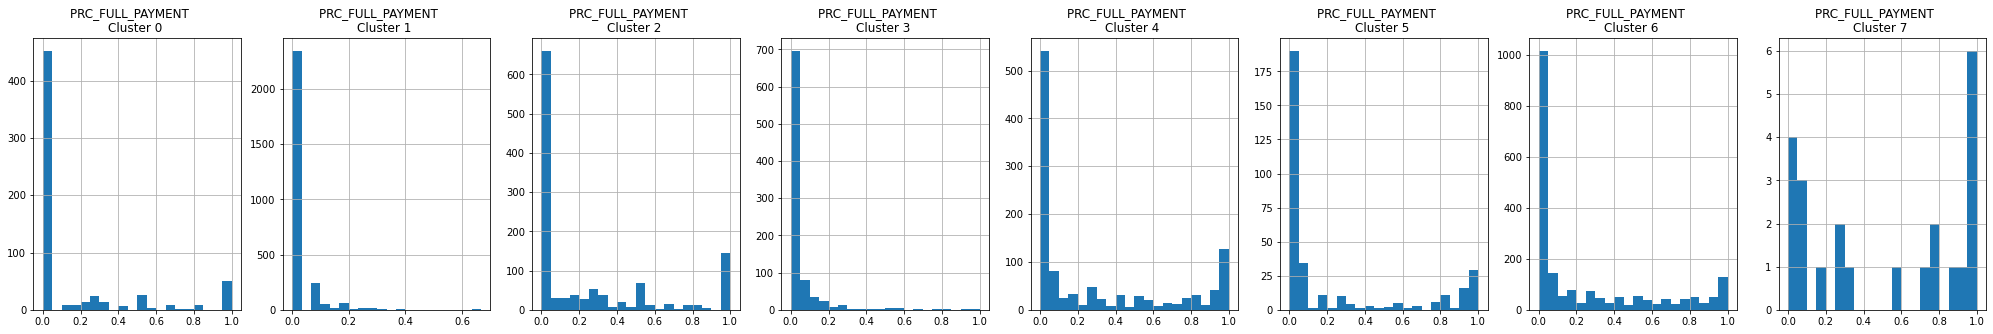

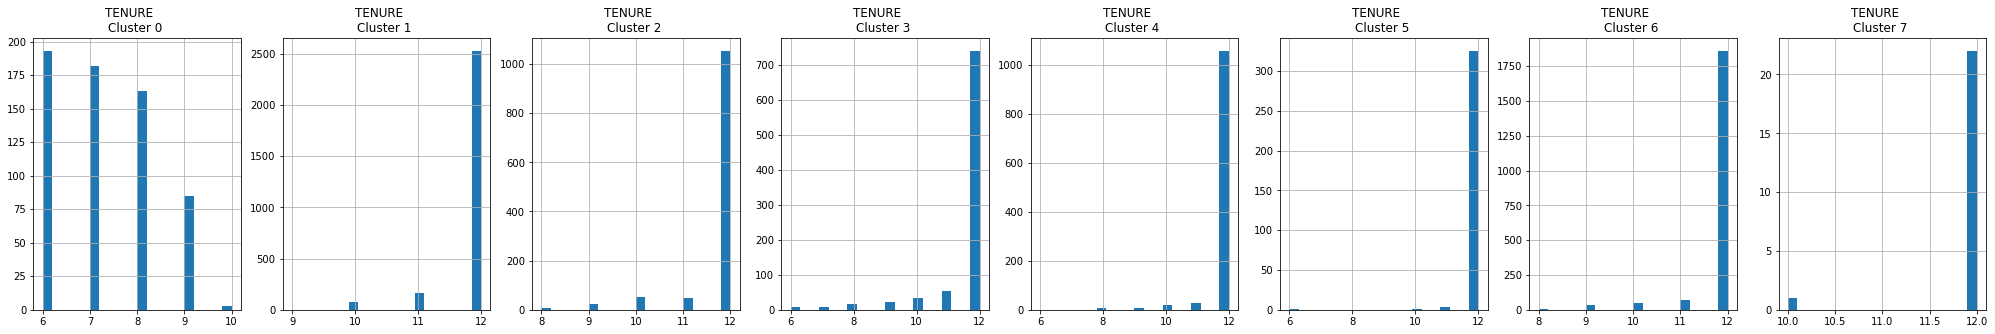

In [38]:
# Plot the histogram of various clusters

for i in creditcard_df.columns:
    mpl.figure(figsize = (35, 5))
    for j in range(8):
        mpl.subplot(1,8,j+1)
        cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
        cluster[i].hist(bins = 20)
        mpl.title('{}    \nCluster {} '.format(i,j))
  
    mpl.show()

## APPLY PRINCIPAL COMPONENT ANALYSIS AND VISUALIZE THE RESULTS

In [39]:
# Obtain the principal components 

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68221987, -1.07644873],
       [-1.13829449,  2.5064754 ],
       [ 0.96967818, -0.38348012],
       ...,
       [-0.92620246, -1.81078799],
       [-2.33654909, -0.65798192],
       [-0.55642355, -0.40046945]])

In [40]:
# Create a dataframe with the two components

pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

pca1      pca2
0 -1.682220 -1.076449
1 -1.138294  2.506475
2  0.969678 -0.383480
3 -0.873628  0.043174
4 -1.599433 -0.688582

In [41]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

pca1      pca2  cluster
0 -1.682220 -1.076449        1
1 -1.138294  2.506475        3
2  0.969678 -0.383480        4
3 -0.873628  0.043174        1
4 -1.599433 -0.688582        1

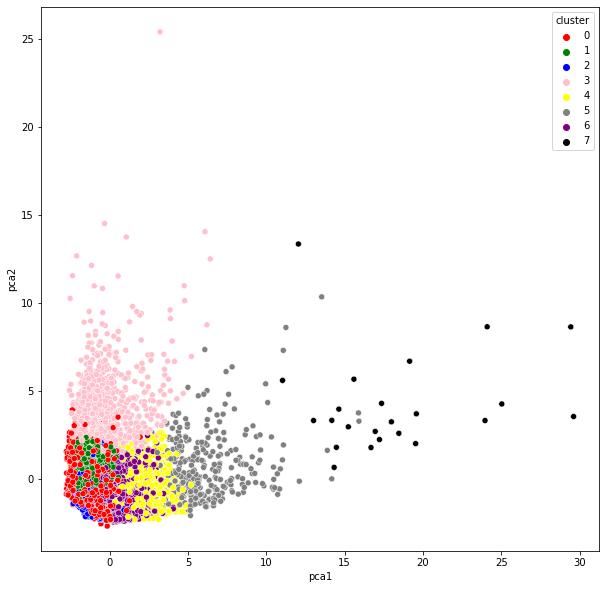

In [42]:
mpl.figure(figsize=(10,10))
ax = sb.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df,
                     palette =['red','green','blue','pink','yellow','gray','purple', 'black'])
mpl.show()

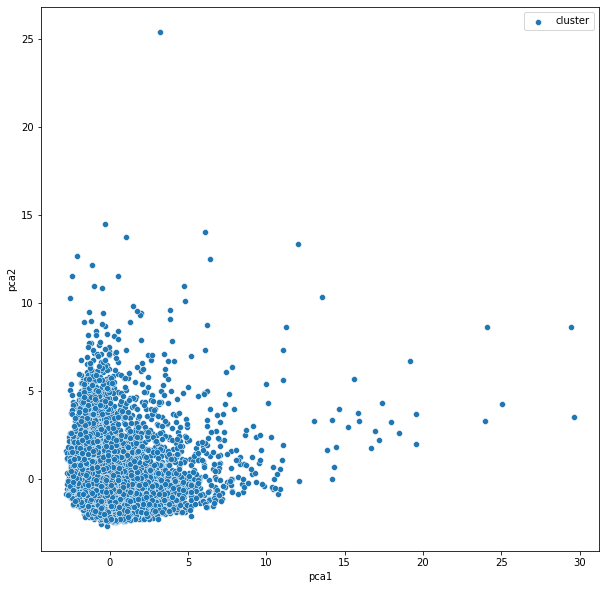

In [43]:
mpl.figure(figsize=(10,10))
ax = sb.scatterplot(x="pca1", y="pca2", label = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple', 'black'])
mpl.show()